# Proyecto Turismo Internacional

# Objetivo

Identificar cuales son las atracciones turísticas principales del mundo, teniendo en cuenta:


*   Tipo de Turismo
*   Nro de visitantes anuales
*   Gasto Promedio
*   Duración promedio de días
*   Actividad destacada
*   Motivo del viaje
*   Tipo de alojamiento





## Preguntas clave e Hipótesis
Cual es la estadía promedio de los turistas?
* Hipótesis: Se cree que la estadía promedio de los turitas son 10 días

Cual es el tipo de turísmo más pupular?

* Hipótesis: Se cree que el tipo de turismo más popular es el Urbano

Cual es la edad mas frecuente de los turistas?

* Hipótesis: Se cree que es 25 años

Cual es el motivo principal del viaje?

* Hipótesis: Se cree que el principal motivo de viaje es vacaciones

Cual es la cuidad más elegida para el turismo de luna de miel?

* Hipótesis: Se crees que es Paris

Cual es el destino histórico más elegido?

* Hipótesis: Se cree que es Roma

Cual es le país más visitado?

* Hipótesis: Se cree que es Francia

Cual es el país que recibe mayores ingresos?

* Hipótesis: Se cree que es Francia





#Análisis del Dataset

In [46]:
from IPython import get_ipython
from IPython.display import display

#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cargo el dataset por url desde github y muestro las dimensiones del dataset
url = "https://raw.githubusercontent.com/Marcos-Munoz84/Mi_proyecto/refs/heads/main/Dataset%20turismo.csv"

df = pd.read_csv(url)
print("dimenisones del dataset (filas, columnas):",df.shape)
df.head()

dimenisones del dataset (filas, columnas): (5000, 21)


,ID,País,Ciudad,Tipo de Turismo,Atracción Principal,Nº de Visitantes Anuales,Gasto Promedio ($),Duración Promedio (días),Temporada Alta,Transporte Principal,...,Idioma,Moneda,Alojamiento Popular,Actividad Destacada,Seguridad,Requisitos de Visa,Valoración (1-5),Fecha de Visita,Edad del Viajero,Motivo del Viaje
0,1,Italia,Roma,Gastronómico,Coliseo,19022905,2668,6,Primavera,Avión,...,Italiano,Euro,Hostales,Anime,Media,No para UE,5,2023-11-28,30,Luna de Miel
1,2,Japón,Tokio,Cultural,Akihabara,43947310,609,9,Verano,Bicicleta,...,Japonés,Yen,Cabañas,Compras,Media,No,1,2023-01-09,20,Luna de Miel
2,3,Italia,Roma,Gastronómico,Coliseo,49437741,1628,14,Primavera,Ferry,...,Italiano,Euro,Hostales,Senderismo,Baja,No,2,2019-03-26,29,Aventura
3,4,Italia,Roma,Playa,Coliseo,44972999,4834,11,Verano,Metro,...,Italiano,Euro,Resort,Gastronomía,Media,No,4,2021-10-20,58,Luna de Miel
4,5,Italia,Roma,Gastronómico,Coliseo,12478151,863,3,Invierno,Taxi,...,Italiano,Euro,Hoteles,Exploración,Alta,Sí,2,2021-07-15,27,Vacaciones


Creamos un histograma para poder identificar las franjas etareas que más viajan

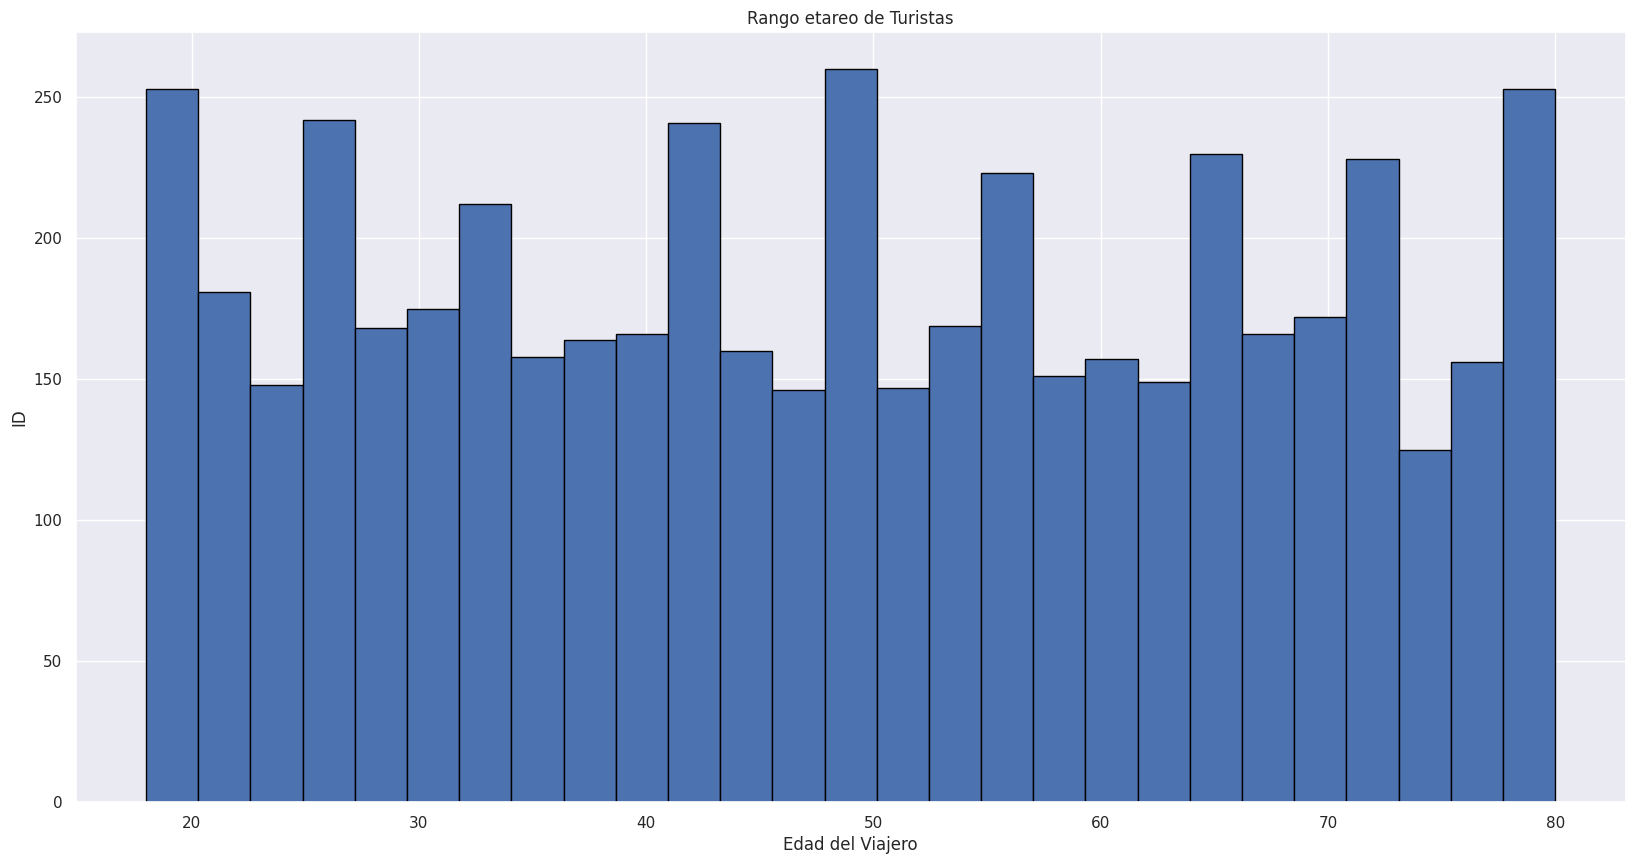

In [14]:
# Creo un histograma para la columna Edad del Viajero
df['Edad del Viajero'].plot(kind='hist', bins=27, edgecolor='black')

# Personalización del gráfico
plt.title('Rango etareo de Turistas')  # Título del histograma
plt.xlabel('Edad del Viajero')  # Etiqueta del eje X
plt.ylabel('ID')  # Etiqueta del eje Y

# Mostrar el histograma
plt.show()

El rango etareo de los turistas es muy variado, pero si se destacan las franjas (19,20), (25,26), (41, 42), (48, 49) y (77,78). Para poder entender porque estas franjas etareas son las que mayor volumen presentan, vamos a ver el motivo de los viajes de estas personas

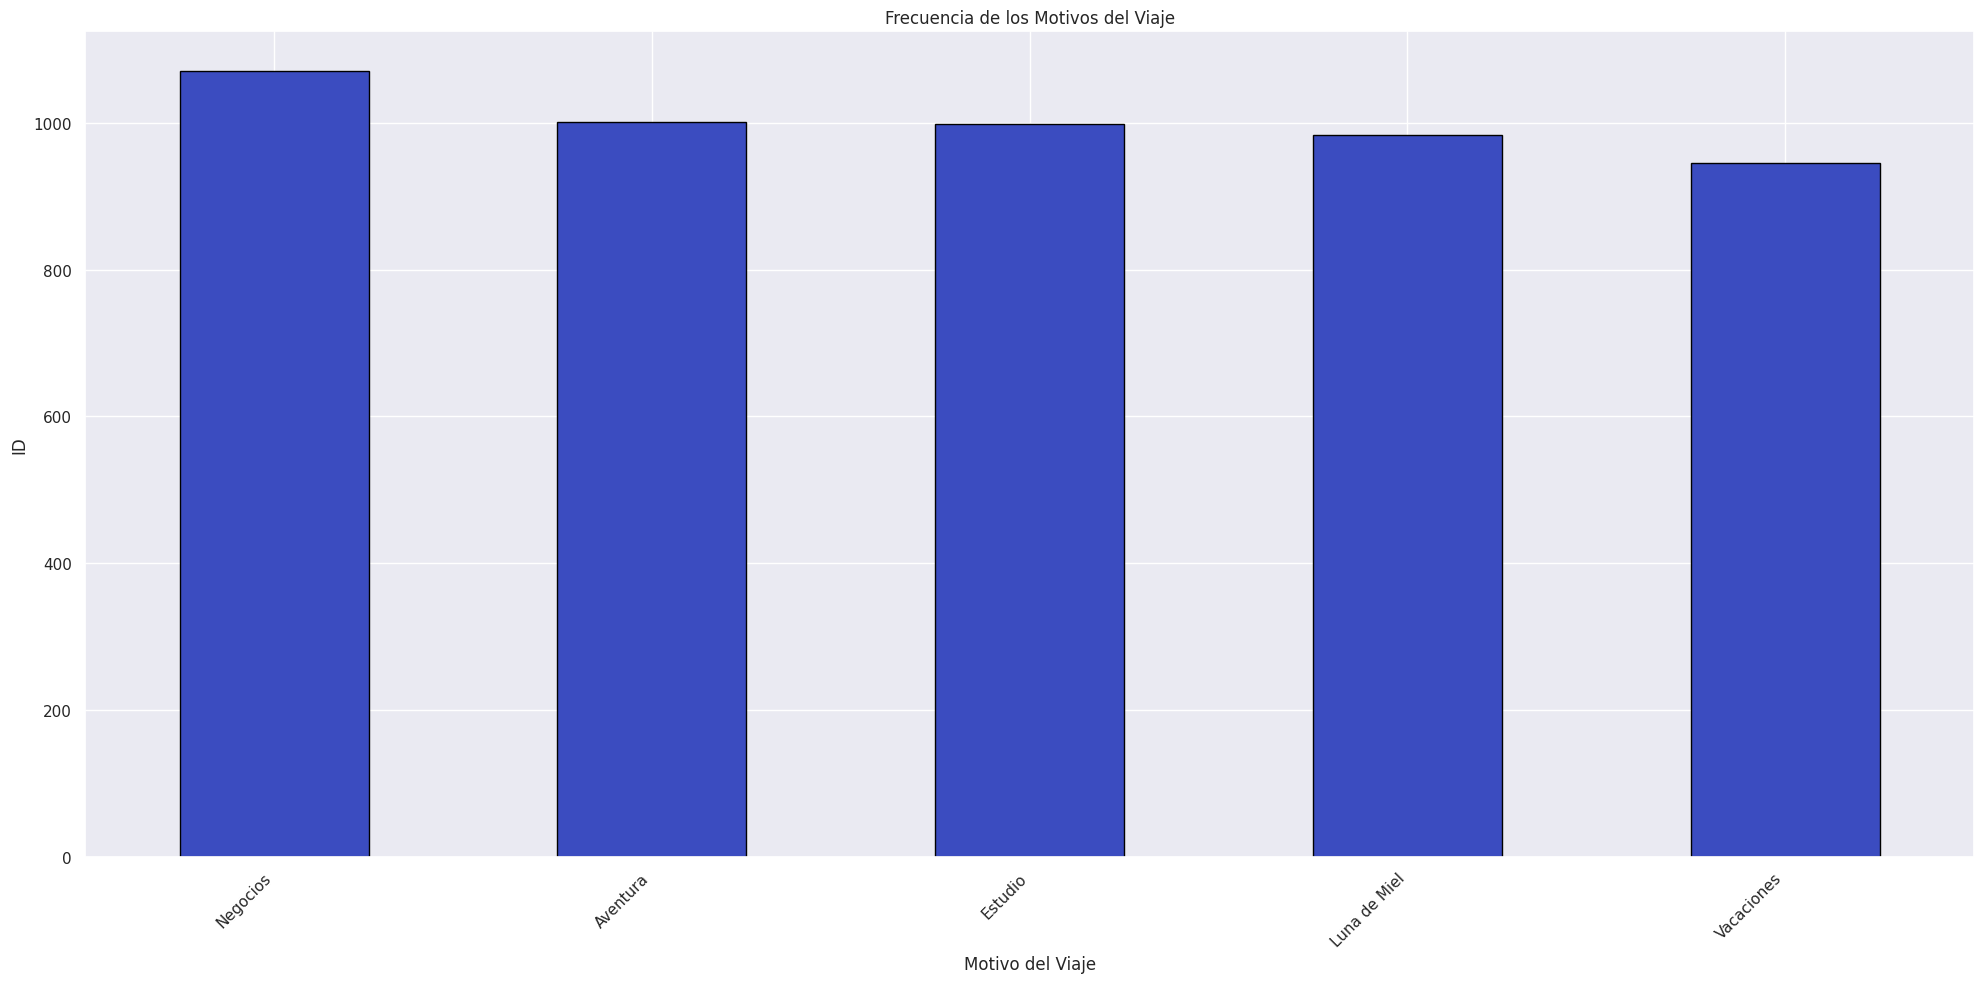

In [47]:
# Agrupo por la columna 'motivo del viaje' y cuento la cantidad de registros para cada motivo
motivos_count = df['Motivo del Viaje'].value_counts()

# Creo un gráfico de barras
motivos_count.plot(kind='bar', cmap='coolwarm', edgecolor='black')

# Personalización del gráfico
plt.title('Frecuencia de los Motivos del Viaje')  # Título del gráfico
plt.xlabel('Motivo del Viaje')  # Etiqueta del eje X
plt.ylabel('ID')  # Etiqueta del eje Y
plt.xticks(rotation=45, ha='right')  # Roto etiquetas en el eje X para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Podemos explicar viendo este gráfico el porque de las franjas etareas que veíamos en el gráfico anterior, el motivo de viaje principal es por "Negocios" que cumplen con lo estipulado de motivo de viaje de las franjas etareas (41,42) (48,49) y (77,78).
Los dos motivos que le siguen en volúmen son "Aventura" y "Estudio" que aplican para las franjas (25,26) y (19,20) respectivamente.

Ahora identificaremos las cuidades que reciben a estos turistas y por medio de un gráfico de líneas con marcadores identificaremos el motivo del viaje a cada una de ellas

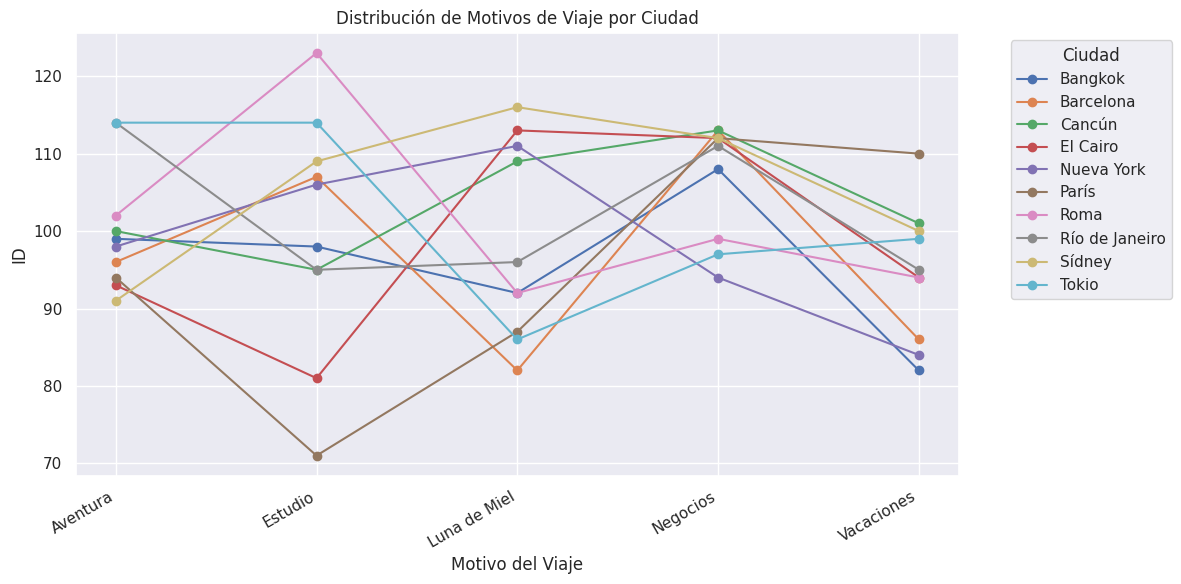

In [21]:
# Agrupo los datos por "motivo del viaje" y "ciudad", contando la cantidad de turistas por "id"
df_grouped = df.groupby(['Motivo del Viaje', 'Ciudad']).size().reset_index(name='count')

# Creo una lista de motivos del viaje
motivos = df_grouped['Motivo del Viaje'].unique()

# realizo un grafico de líneas y marcadores
plt.figure(figsize=(12,6))

# Dibujo una línea para cada ciudad
for ciudad in df_grouped['Ciudad'].unique():
    ciudad_data = df_grouped[df_grouped['Ciudad'] == ciudad]
    plt.plot(ciudad_data['Motivo del Viaje'], ciudad_data['count'], marker='o', label=ciudad)

# Personalización del gráfico
plt.title('Distribución de Motivos de Viaje por Ciudad')
plt.xlabel('Motivo del Viaje')
plt.ylabel('ID')
plt.xticks(rotation=30, ha='right')  # Rotar las etiquetas del eje X
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda con las ciudades

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Por medio de este gráfico podemos identificar claramente los motivos por los cuales los turistas eligen cada destino.

Motivos de Viaje:


*   Aventura: Destino más elegido "Tokio" menos elegido "Sidney"
*   Estudio: Destino más elegido "Roma" menos elegido "Paris"

*   Luna de Miel: Destion más elegido "Sydney" menos elegido "Barcelona"
*   Negocios: Destino más elegido "Cancun" menos elegido "Nueva York"

*   Vacaciones: Destino más elegido "Paris" menos elegido "Bangkok"








# Duración de la estadía

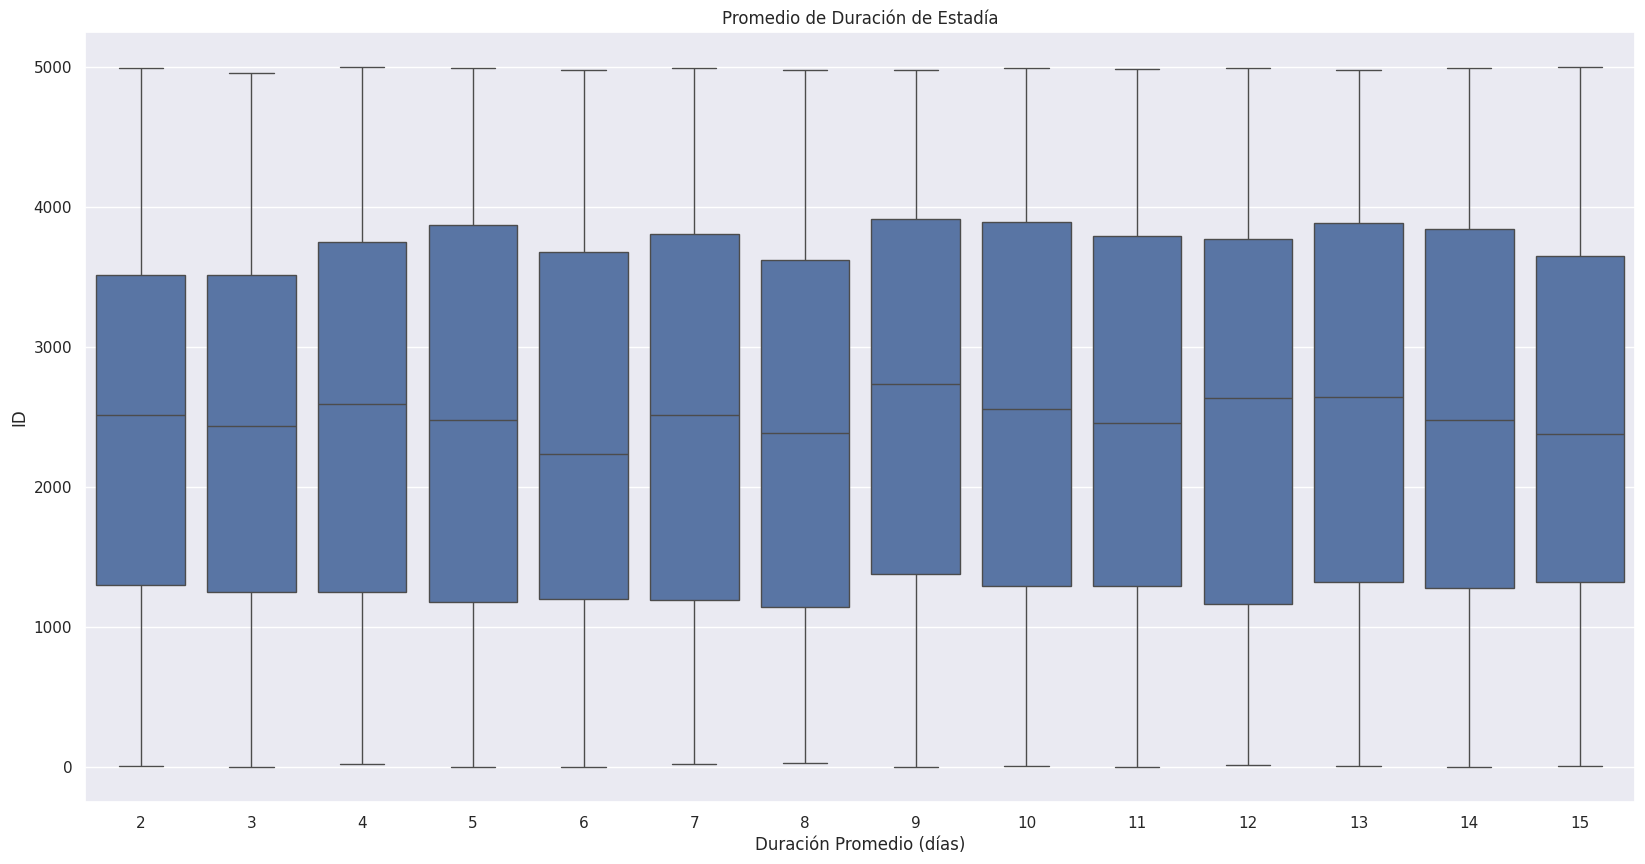

In [48]:
sns.set_theme(style="dark")

# Doy dimensiones al gráfico
sns.set(rc={'figure.figsize':(20,10)})
# 2) Boxplot por estadía
ax = sns.boxplot(x="Duración Promedio (días)", y="ID", data=df)
#Creo un boxplot con la variable
plt.title('Promedio de Duración de Estadía')
plt.show()

Las estadías de los turistas en las diferentes ciudades no varían demasiado una con respecto a la otra, las duraciones promedio más frecuentes son: 5, 9, 10 y 13 días

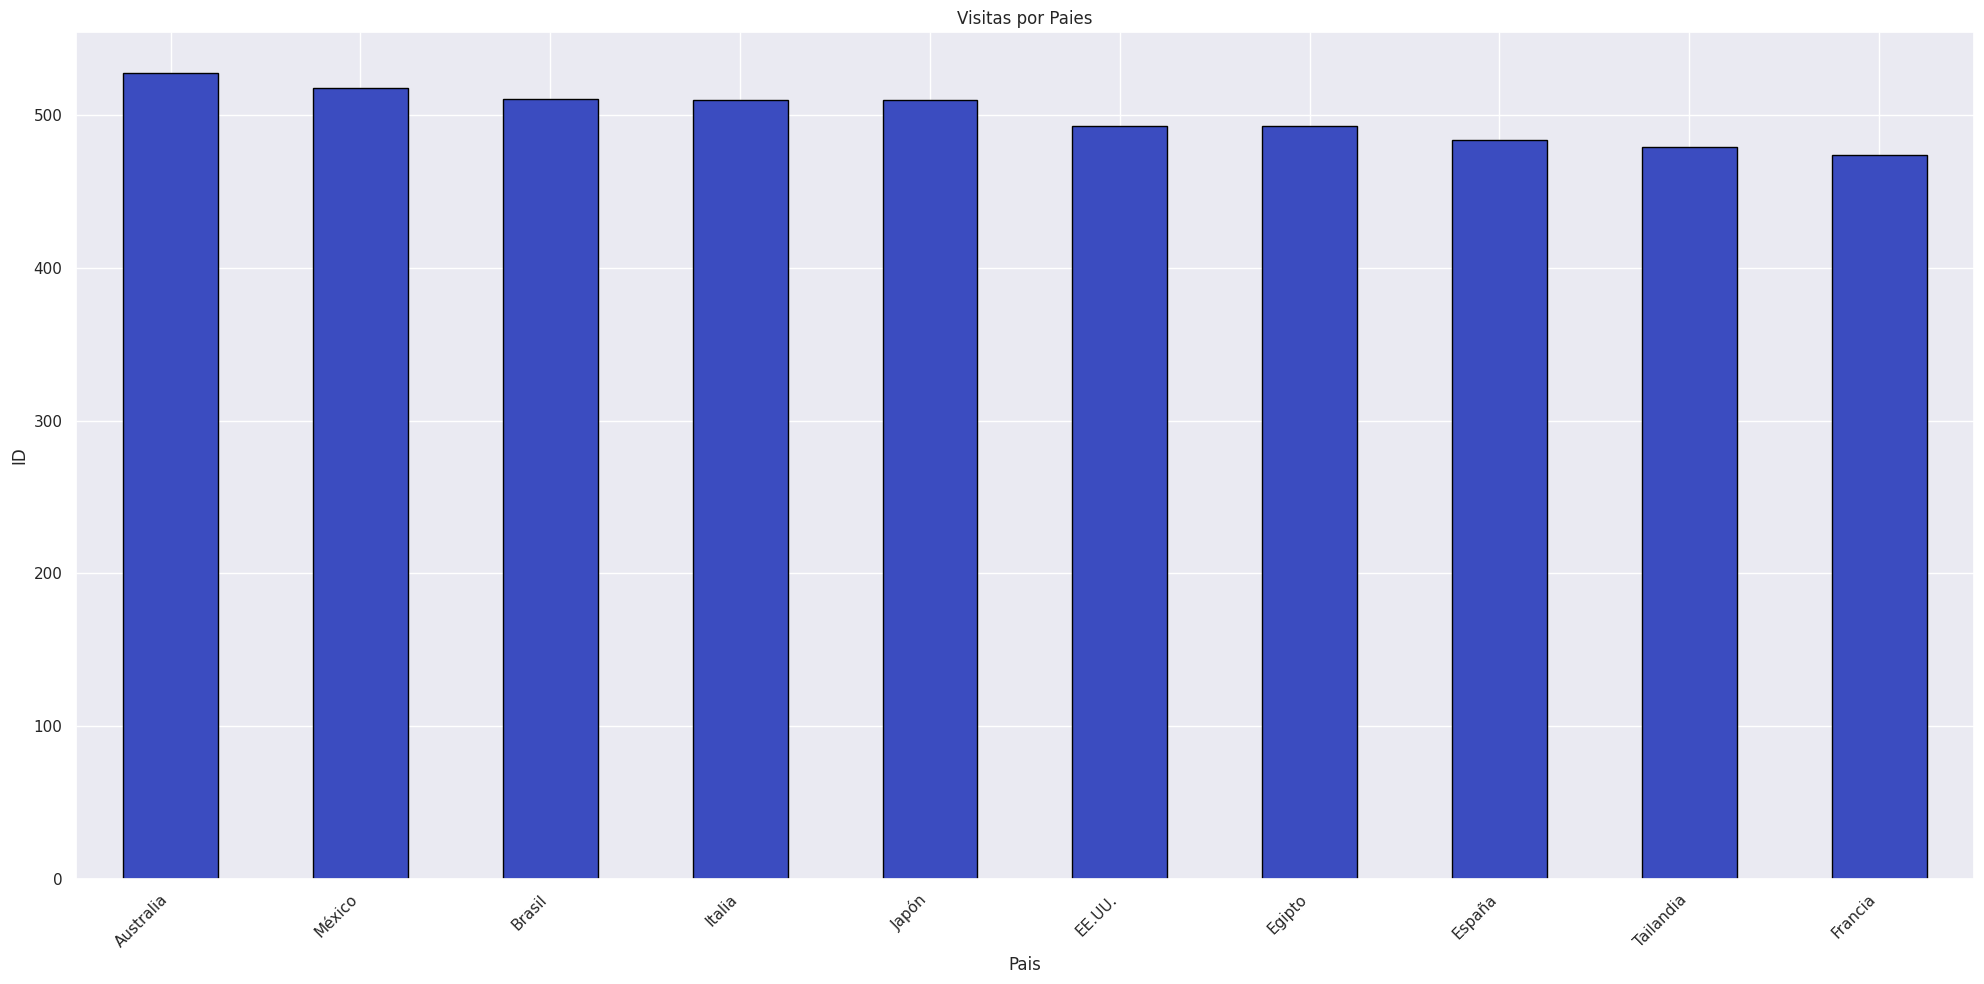

In [37]:
# Cuento cuántas veces aparece cada país
country_counts = df["País"].value_counts()

country_counts.plot(kind='bar', cmap='coolwarm', edgecolor='black')
plt.title('Visitas por Paies')  # Título del gráfico
plt.xlabel('Pais')  # Etiqueta del eje X
plt.ylabel('ID')  # Etiqueta del eje Y
plt.xticks(rotation=45, ha='right')  # Roto etiquetas en el eje X para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El país más visitado es Australia, seguido por Mexico y Brasil

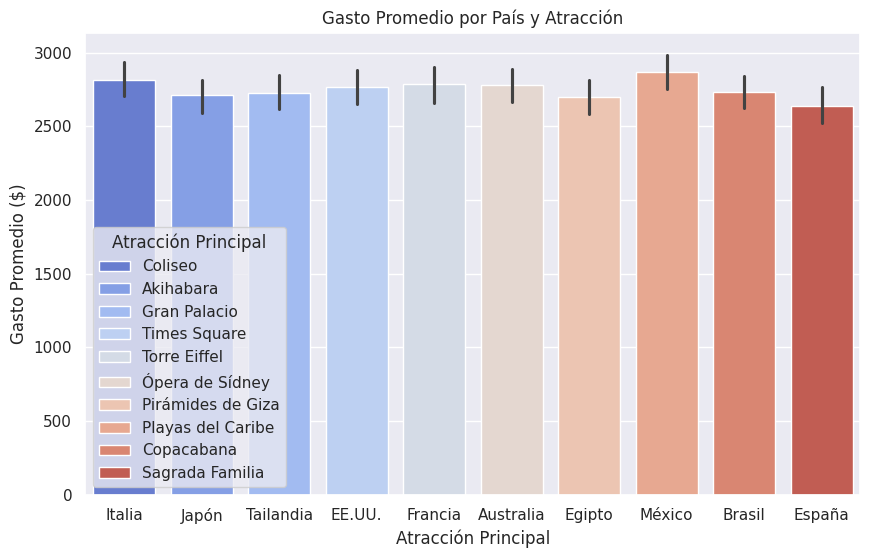

In [6]:
# Creo una figura y asigno tamaño
plt.figure(figsize=(10,6))
# Creo un gráfico de barras
sns.barplot(x="País", y="Gasto Promedio ($)", hue="Atracción Principal", data=df, palette="coolwarm")

# Etiquetas y título
plt.xlabel("Atracción Principal")
plt.ylabel("Gasto Promedio ($)")
plt.title("Gasto Promedio por País y Atracción")

plt.show()


El destino que más ingreso tiene por el gasto promedio de los turistas es México, por sus playas del Caribe.
El segundo es Italia por el Coliseo, comparten el tercer lugar Francia con la Torre Eiffel y Australia con la Opera de Sidney

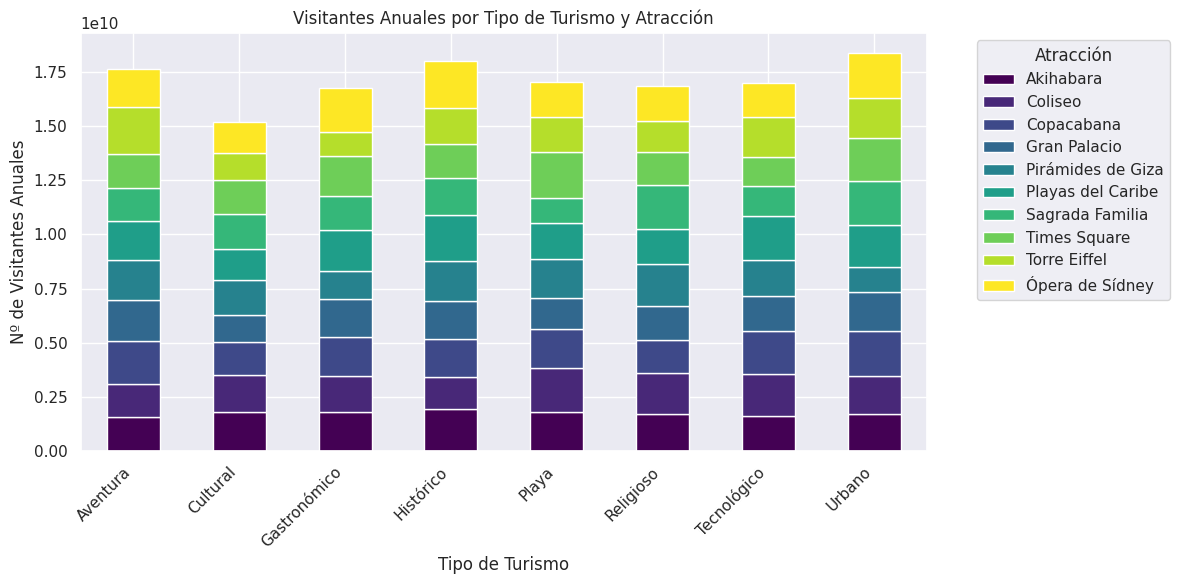

In [45]:
# Agrupo por 'Tipo de Turismo' y 'Atracción', sumando los visitantes anuales
df_grouped = df.groupby(['Tipo de Turismo', 'Atracción Principal'])['Nº de Visitantes Anuales'].sum().unstack()

# Creo un gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap="viridis")

# Personalización del gráfico
plt.title('Visitantes Anuales por Tipo de Turismo y Atracción')
plt.xlabel('Tipo de Turismo')
plt.ylabel('Nº de Visitantes Anuales')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X
plt.legend(title='Atracción', bbox_to_anchor=(1.05, 1), loc='upper left')  # Muestro leyenda con las atracciones

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este gráfico podemos ver la distrubución de visitantes por Tipo de Turismo y Atracción.

El turismo urbano es el de mayor concurrencia, seguido del Historico y de Aventura.

En el siguiente gráfico podemos ver las "Atracciones Principales" más y menos elegidas por el "Tipo de Turismo".

Tipo de Turismo:


*   Aventura: Destino más elegido "Torre Eiffel" menos elegido "Times Square"
*   Cultural: Destino más elegido "Coliseo" menos elegido "Akihabara"
*   Gastronómico: Destino más elegido "Opera de Sidney"menos elegido Copacabana"
*   Histórico: Destino más elegido "Playas del caribe" menos elegido "Coliseo"
*   Playa: Destino más elegido "Coliseo" menos elegido "Sagrada Familia"
*   Religioso: destino más elegido "Sagrada Familia" menos elegido "Paris"
*   Tecnológico: Destino más elegido "Copacabana" menos elegido "Times Square"
*   Urbano: Destino más elegido "Opera de Sidney" menos elegido "Pirámides de Giza"

# Conclusiones

* Las estadías promedio de los turistas se estimo en 10 días y en realidad son de  5, 9, 10 y 13 días.
* El tipo de turismo más populas si es el Urbano
* La edad más frecuente de los turistas si bien no es solamente 25 años, es una de las franjas etareas que más lo hace.
* El motivo principal del viaje se creía que era por vacaciones y realmente es por negocios
* La ciudad más elegida para "lunas de miel" se creía que era Paris, pero es Sidney.
* El destino histórico más elegido se creía que era Roma, pero son las Playas del Caribe
* El país más visitado se creía que era Francia pero es Australia
* El país que recibe mayores ingresos se creía que era Francia pero es Mexico



